
## Accessing through the Task class


### loading image


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  

from asterism import data_dir
from asterism.core.image_manager.image import Image
from asterism.analysis_tasks.source_detection.background_estimation.background_estimation import DoSetBkgThreshTask
from asterism.analysis_tasks.source_detection.image_segmentation.image_segmentation import DoImageSegmentationTask
from asterism.analysis_tasks.source_detection.deblending.denclue_deblending import DoDENCLUEDeblendingTask
import  numpy as np

image=Image.from_fits_file(data_dir+'/deblending_img1.fits')

### bkg estimation


In [6]:
bkg_task=DoSetBkgThreshTask()
bkg_task.list_parameters()
bkg_task.set_par('plot',value=False)
bkg_task.set_par('skewness_range',value=0.1)
bkg_task.set_par('sub_block_frac_size',value=0.1)

|-------------------------------------------------------
|task: bkg_treshold
|
| par_name= sub_block_frac_size   value= None   doc=  if provided, the bkg pixels are extracted from the sub-block with lowest integrated flux, having a size equal
                                          to sub_block_frac_size time the image size
| par_name= min_size_ratio   value= 0.1   doc=  provides the minimum size to stop the clipping in the skewness minimization
| par_name= n_std_th   value= 4.5   doc=  number of bakground deviation to set threshold, th=bkg_level+n_std_th*bkg_sig
| par_name= resampling_size   value= 1000000   doc=  if the image pixels number>resampling_size,
                                            then a random resampling of pixels is performed, with a final number= resampling_size
| par_name= skewness_range   value= 0.1   doc=  if not None, |skewness| is minimized in the range |bkg_lvl,bgk_lvl+skewness_range*bkg_std| 
| par_name= use_fixed_th   value= None   doc=  if not None, t

In [7]:
bkg_threshold,bkg_mode,bkg_sig=bkg_task.run(image=image)

|------------------------------
| Task: bkg_treshold Start
|------------------------------
|setting threshold
|image flux min 0.0 image flux max 9.71633911133
|using sub blocks
|sub blocks grid built
|sub block side 31
|sub blocks Num 9
|-
|skewness minimization 961
|flux bkg array  min,max 0.0886840820312 0.458374023438
|minimization of |skewness|
|initial skewness 0.160161054539
|initial mean 0.250037394255
|initial std 0.0593948364258
|range of threshold for skewness minimization th_skew in [0.244098,0.255977]
|start size:  961 0.250037394255 0.0593948364258 0.160161054539 961
|min skewness=0.000577 for th_skew=0.062649
|size ratio=0.706556, min_size ratio=0.100000
|-
|bkg_lvl 0.248482923269
|bkg_std 0.0411071777344
|bkg_th 0.433465223074


### image segmenetation


In [8]:
image_seg_task=DoImageSegmentationTask()
image_seg_task.list_parameters()

|-------------------------------------------------------
|task: image_segmentation
|
| par_name= method   value= dbscan_binned   doc=  method: dbscan or dbscan_binned, from_seg_map
| par_name= bkg_threshold   value= None   doc=  
| par_name= K   value= 1.5   doc=   sets the segmentation threshold as K*bkg_threshold 
| par_name= K_pix   value= False   doc=  if True,  total flux in the dbscan bursh is divided by the number of pixels in the brush, and the compared to K*bkg_threshold
| par_name= seg_map_bkg_val   value= 0   doc=  value for the bkg pixels in the seg map (default 0)
| par_name= dbscan_eps   value= 1.0   doc=  the scanning brush radius for the dbscan. (In the case of binned, it is the size of the scanning box)
| par_name= verbose   value= False   doc=  set  verbosity on
| par_name= plot   value= False   doc=  plot the segmentation results
| par_name= max_image_size   value= 1000000   doc=  if is not None, the image is segmented in substamps, according to bkg_threshold
| par_n

In [9]:
image_seg_task.set_par('bkg_threshold',value=float(bkg_threshold))
image_seg_task.set_par('K',value=1.5)
image_seg_task.set_par('K_pix',value=True)
image_seg_task.set_par('plot',value=True)

|-------------------------------------------------------
|task: image_segmentation
|
| par_name= method   value= dbscan_binned   doc=  method: dbscan or dbscan_binned, from_seg_map
| par_name= bkg_threshold   value= 0.433465223074   doc=  
| par_name= K   value= 1.5   doc=   sets the segmentation threshold as K*bkg_threshold 
| par_name= K_pix   value= True   doc=  if True,  total flux in the dbscan bursh is divided by the number of pixels in the brush, and the compared to K*bkg_threshold
| par_name= seg_map_bkg_val   value= 0   doc=  value for the bkg pixels in the seg map (default 0)
| par_name= dbscan_eps   value= 1.0   doc=  the scanning brush radius for the dbscan. (In the case of binned, it is the size of the scanning box)
| par_name= verbose   value= False   doc=  set  verbosity on
| par_name= plot   value= True   doc=  plot the segmentation results
| par_name= max_image_size   value= 1000000   doc=  if is not None, the image is segmented in substamps, according to bkg_threshold

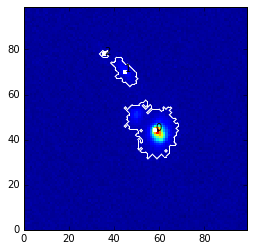

In [10]:
image_seg_task.list_parameters()

clusters_list,K,selected_coords=image_seg_task.run(image=image)

### denclue deblending


In [11]:
deblendig=DoDENCLUEDeblendingTask()
deblendig.list_parameters()

|-------------------------------------------------------
|task: denclue_deblending
|
| par_name= gl_downsampling   value= False   doc=  if True, a GuassLaplace downsampling of the target coordiantes is performed 
| par_name= h_grid   value= 3   doc=   grid  mesh in pixels for the downsampling
| par_name= gl_th_rel   value= 0.1   doc=  relative threshold for the GaussLaplace local maxima detection
| par_name= eps   value= 0.01   doc=  sets the stop threshold for the recursive attractor update rule
| par_name= digitize_attractors   value= False   doc=  if True, will approximate the final attractor position to the coordinate of the closest image pixel 
| par_name= kernel   value= gauss   doc=  smoothing  kernel
| par_name= k_table_size   value= None   doc=  if not None, the kernel is precomputed in a look-up table over a grid with size equal to  k_table_size
| par_name= h_frac   value= 0.1   doc=  sets the width of the kernel as h=h_frac*sqrt(r_max^2+r_cluster^2)
| par_name= h_min   value

In [12]:
deblendig.set_par('gl_downsampling',value=False)
deblendig.set_par('h_frac',value=0.1)
deblendig.set_par('plot',value=True)
deblendig.set_par('verbose',value=True)

|------------------------------
| Task: denclue_deblending Start
|------------------------------
|-
|debelnding for cluster 0 r_cluter 8.24967991157 r_max 15.2908684383 size 378 9
|eps 0.01
|h 1.73743453471
|setting R_max with method auto
|R_max [ 8.35672967]
|running denclue with
|kernel  gauss
|h  1.73743453471
|eps 0.01
|R_max set to [ 8.35672967]
| find attractors
|position array size  378
|target position array size  378
|comp. time 0.30864405632
|denclue done
|dbs cl=0, x_c=15.348856, y_c=11.986082
|dbs cl=1, x_c=6.044407, y_c=19.809481


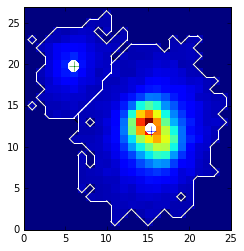

|-
|-
|debelnding for cluster 1 r_cluter 4.07843469095 r_max 7.0304016584 size 77 9
|eps 0.01
|h 1.0
|setting R_max with method auto
|R_max [ 4.80980981]
|running denclue with
|kernel  gauss
|h  1.0
|eps 0.01
|R_max set to [ 4.80980981]
| find attractors
|position array size  77
|target position array size  77
|comp. time 0.16042304039
|denclue done
|dbs cl=0, x_c=6.771844, y_c=7.129548


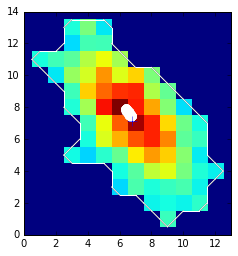

|-
|-
|debelnding for cluster 2 r_cluter 1.34960311626 r_max 1.77658380044 size 8 9
|-


In [13]:
deblendig.run(clusters_list=clusters_list)

## Accessing directly the do_denclue_deblending()

In [14]:
from asterism import data_dir
from asterism.core.image_manager.image import Image
from asterism.analysis_tasks.source_detection.background_estimation.background_estimation import set_thresh
from asterism.analysis_tasks.source_detection.image_segmentation.image_segmentation import do_image_segmentation
from asterism.analysis_tasks.source_detection.deblending.denclue_deblending import do_denclue_deblending

image=Image.from_fits_file(data_dir+'/deblending_img1.fits')

In [15]:
bkg_threshold,bkg_mode,bkg_sig=set_thresh(image,sub_block_frac_size=0.1,skewness_range=0.1,plot=False)

|setting threshold
|image flux min 0.0 image flux max 9.71633911133
|using sub blocks
|sub blocks grid built
|sub block side 31
|sub blocks Num 9
|-
|skewness minimization 961
|flux bkg array  min,max 0.0886840820312 0.458374023438
|minimization of |skewness|
|initial skewness 0.160161054539
|initial mean 0.250037394255
|initial std 0.0593948364258
|range of threshold for skewness minimization th_skew in [0.244098,0.255977]
|start size:  961 0.250037394255 0.0593948364258 0.160161054539 961
|min skewness=0.000577 for th_skew=0.062649
|size ratio=0.706556, min_size ratio=0.100000
|-
|bkg_lvl 0.248482923269
|bkg_std 0.0411071777344
|bkg_th 0.433465223074


|method dbscan_binned
|K, 0.65019783461
|bkg th 0.433465223074


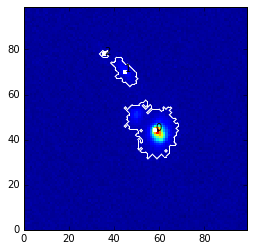

In [17]:
clusters_list,K,selected_coords=do_image_segmentation(image,bkg_threshold,K=np.float_(1.5),K_pix=True,plot=True)

### denclue deblendings

|-
|debelnding for cluster 0 r_cluter 8.24967991157 r_max 15.2908684383 size 378 9
|R_max 8.24967991157
|comp. time 0.10226392746
|denclue done
|dbs cl=0, x_c=14.810205, y_c=11.953806
|dbs cl=1, x_c=6.911037, y_c=19.636510


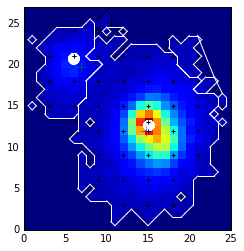

|-
|-
|debelnding for cluster 1 r_cluter 4.07843469095 r_max 7.0304016584 size 77 9
|R_max 4.07843469095
|comp. time 0.0175330638885
|denclue done
|dbs cl=0, x_c=8.667780, y_c=2.680334
|dbs cl=1, x_c=7.847731, y_c=5.755992
|dbs cl=2, x_c=8.474922, y_c=7.924534
|dbs cl=3, x_c=4.974973, y_c=8.548267
|dbs cl=4, x_c=6.149232, y_c=9.844471


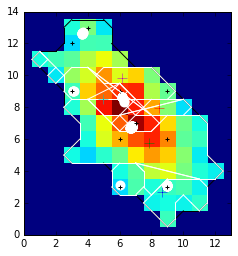

|-
|-
|debelnding for cluster 2 r_cluter 1.34960311626 r_max 1.77658380044 size 8 9
|-


In [19]:
do_denclue_deblending(clusters_list=clusters_list,gl_downsampling=True,h_frac=0.1,plot=True)